In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import efficientnet.keras as efn

BATCH_SIZE = 64
EPOCH_SIZE = 64

In [2]:
# use pretrained model wo/ top.
vgg = efn.EfficientNetB0(input_shape=[128,128,3], include_top=False, weights='imagenet')
for layer in vgg.layers:
    layer.trainable = False
x = tf.keras.layers.Flatten()(vgg.output) # new top
x = tf.keras.layers.Dense(3, activation='sigmoid')(x) # x,y,w=h
model1 = tf.keras.models.Model(vgg.input, x)
model1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
print(model1.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 64, 64, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 64, 64, 32)   128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 64, 64, 32)   0           stem_bn[0][0]                    
______________________________________________________________________________________________

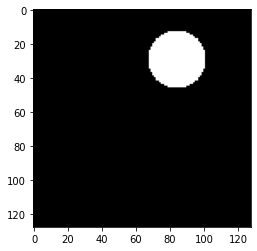

In [3]:
from matplotlib.patches import Circle

def synthetic_gen(batch_size=BATCH_SIZE):
    while True:  # enable gen infinite amount of batches
        X = np.zeros((batch_size, 128, 128, 3)) # input
        Y = np.zeros((batch_size, 3)) # truth (output)
        for i in range(batch_size):
            x = np.random.randint(8,120)
            y = np.random.randint(8,120)
            a = min(128 - max(x,y), min(x,y))
            r = np.random.randint(4,a) # radius
            for x_i in range(128):
                for y_i in range(128):
                    if ((x_i-x)**2) + ((y_i-y)**2) < r**2:
                        X[i, x_i, y_i, :] = 1
            Y[i,0] = (x-r)/128.
            Y[i,1] = (y-r)/128.
            Y[i,2] = 2*r / 128.
        yield X, Y

x,y = next(synthetic_gen())
plt.imshow(x[0]) # sanity check

In [4]:
model1.fit(synthetic_gen(), steps_per_epoch=EPOCH_SIZE, epochs=5)

Epoch 1/5
64/64 [==============================] - 36s 558ms/step - loss: 0.5488
Epoch 2/5
64/64 [==============================] - 36s 563ms/step - loss: 0.4984
Epoch 3/5
64/64 [==============================] - 36s 565ms/step - loss: 0.4959
Epoch 4/5
64/64 [==============================] - 36s 562ms/step - loss: 0.4949
Epoch 5/5
64/64 [==============================] - 36s 562ms/step - loss: 0.4978


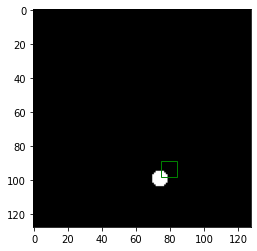

In [7]:
from matplotlib.patches import Rectangle

def plot_pred(img, p):
    fig, ax = plt.subplots(1)
    ax.imshow(img) # input image is 128, 128
    rect = Rectangle(xy=(p[1]*128, p[0]*128), width=p[2]*128, height=p[2]*128, linewidth=1, edgecolor='g', facecolor='none')
    ax.add_patch(rect)
    plt.show()

x, _ = next(synthetic_gen())  # new image (randomly generated)
p = model1.predict(x)
plot_pred(x[0], p[0])